In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading glioma...
Loading meningioma...
Loading notumor...
Loading pituitary...


<ipython-input-3-8aafae6cc75c>:61: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_14']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


288/288 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.4722 - loss: 1.6293 - val_accuracy: 0.8193 - val_loss: 0.5356
Epoch 2/25
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7767 - loss: 0.6047 - val_accuracy: 0.8480 - val_loss: 0.4360
Epoch 3/25
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8243 - loss: 0.4746 - val_accuracy: 0.8662 - val_loss: 0.3917
Epoch 4/25
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8573 - loss: 0.3876 - val_accuracy: 0.8740 - val_loss: 0.3613
Epoch 5/25
288/288 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8785 - loss: 0.3476 - val_accuracy: 0.8844 - val_loss: 0.3325
Epoch 6/25
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8807 - loss: 0.3186 - val_accuracy: 0.8923 - val_loss: 0.3133
Epoch 7/25
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8974 - loss: 0.2846 - val_accuracy: 0.8949 - val_loss: 0.3043
Epoch 8/25
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9161 - loss: 0.2635 - val_accuracy: 0.89

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_14']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.94      0.88      0.91       283
  meningioma       0.86      0.90      0.88       263
     notumor       0.97      0.97      0.97       317
   pituitary       0.97      0.98      0.97       288

    accuracy                           0.93      1151
   macro avg       0.93      0.93      0.93      1151
weighted avg       0.93      0.93      0.93      1151



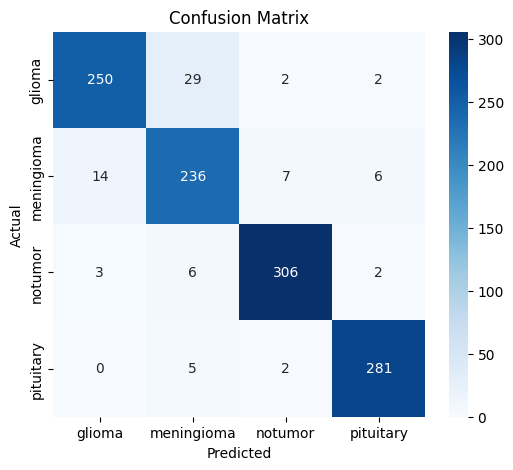

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://becb913a9513335bd4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [3]:
import os
import cv2
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Constants
IMG_SIZE = 128
BATCH_SIZE = 16
EPOCHS = 25
DATASET_PATH = '/content/drive/MyDrive/Brain Tumor Segmentation/Training'
CATEGORIES = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load and preprocess images
data, labels = [], []
for category in CATEGORIES:
    folder_path = os.path.join(DATASET_PATH, category)
    print(f"Loading {category}...")
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(category)
        except:
            continue

data = np.array(data) / 255.0

# Encode labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(lb.inverse_transform(labels)),
                                     y=lb.inverse_transform(labels))
class_weights = dict(enumerate(class_weights))

# Build transfer learning model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(CATEGORIES), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    class_weight=class_weights,
                    verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=lb.classes_))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=lb.classes_, yticklabels=lb.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Prediction function for Gradio
def predict_image(image):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = np.expand_dims(image, axis=0) / 255.0
    prediction = model.predict(image)[0]
    predicted_class = np.argmax(prediction)
    confidence = prediction[predicted_class]
    return {lb.classes_[predicted_class]: float(confidence)}

# Gradio interface
interface = gr.Interface(fn=predict_image,
                         inputs=gr.Image(type='pil'),
                         outputs=gr.Label(num_top_classes=4),
                         title="Brain Tumor Classifier",
                         description="Upload an image to classify a brain tumor as glioma, meningioma, notumor, or pituitary.")
interface.launch()